# 1. 데이터 읽기

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/gapminder.tsv', sep = '\t')

In [3]:
print(df)

          country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[1704 rows x 6 columns]


In [4]:
df.shape

(1704, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


<!-- object : string과 같은 의미이다. -->

In [6]:
df.head(10)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


### 1-1 열 추출하기

In [8]:
df['country']

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [9]:
df['continent']

0         Asia
1         Asia
2         Asia
3         Asia
4         Asia
         ...  
1699    Africa
1700    Africa
1701    Africa
1702    Africa
1703    Africa
Name: continent, Length: 1704, dtype: object

In [10]:
type(df['continent'])

pandas.core.series.Series

In [12]:
type(df['lifeExp'])

pandas.core.series.Series

In [14]:
df1 = df['lifeExp']
df1.head()

0    28.801
1    30.332
2    31.997
3    34.020
4    36.088
Name: lifeExp, dtype: float64

In [15]:
#  이렇게 하면 에러난다

df['country', 'continent', 'lifeExp']
df.head()

KeyError: ('country', 'continent', 'lifeExp')

<!-- 위 df에 여러 속성을 출력하면 에러가 난다. dataframe은 리스트에만 반응하기 때문에 [ ]로 한 번 더 감싸줘야 한다.(*아래 코드 참고) -->

In [17]:
df2 = df[['country', 'continent','year','gdpPercap']]
df2.head()

,country,continent,year,gdpPercap
0,Afghanistan,Asia,1952,779.445314
1,Afghanistan,Asia,1957,820.853030
2,Afghanistan,Asia,1962,853.100710
3,Afghanistan,Asia,1967,836.197138
4,Afghanistan,Asia,1972,739.981106


In [21]:
type(df1), type(df2)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

### 1-2 행 추출하기

#### 1-2-1. loc[ ]

loc(label-based location)란? 인덱스나 열 이름을 통해 데이터를 선택하거나 필터링하는 기능을 제공

1. df.loc[row name]
    - loc[ '조건' ] : [ ]안에는 찾고자 하는 값에 대한 조건을 넣을 수 있다. 조건 중 하나가 row, column 이며 그 외에 비교연산자 혹은 불리언으로 조건을 입력할 수 있다. 2개 이상의 조건을 입력할 때는 df.loc[(*df[조건1]) & df[조건2]* )처럼 괄호로 반드시 묶어야 한다. 또한, ' & ' 또는 ' | ' 연산자를 사용해서 여러 조건을 결합할 수 있다.
    - 조건 예시1. df.loc[(df['나이' >= 30] & df['성별' == '여'])]
    - 조건 예시2. df.loc[[1,3], ['나이', '성별']] >> index = 1과 3인 행에서 '나이'와 '성별' 열의 값만 가져온다
    - 조건 예시3. df.loc[:,['이름','나이']] >> 모든 행에 대한 '이름'과 '나이' 값을 가져온다
2. df.iloc[row number]

In [23]:
df.loc[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object

In [31]:
df.loc[(df['country'] == 'Peru') & (df['year'] > 1990)]

,country,continent,year,lifeExp,pop,gdpPercap
1208,Peru,Americas,1992,66.458,22430449,4446.380924
1209,Peru,Americas,1997,68.386,24748122,5838.347657
1210,Peru,Americas,2002,69.906,26769436,5909.020073
1211,Peru,Americas,2007,71.421,28674757,7408.905561


In [33]:
df.loc[[0,1,4]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


#### 1-2-2. iloc[ ]

iloc란(integer location)? 정수 기반 순번(index no.)으로 원하는 행을 불러올 때 사용한다.

1. loc는 이름이나 조건을 사용해서 데이터를 선택하고, iloc는 순서를 사용해 선택한다.
2. 슬라이싱 (연속된 범위 선택) : 연속된 행이나 열을 선택할 때는 슬라이싱 문법을 사용합니다. 슬라이싱(start:end)은 연속된 범위를 나타내는 방법으로, iloc에서 이를 사용할 때는 별도의 리스트가 필요 없어요. 슬라이싱 자체가 이미 연속된 범위를 나타내기 때문에 대괄호로 따로 감싸지 않는다.

In [34]:
df.iloc[[0,1,4]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [40]:
df.loc[[0],['country']]

,country
0,Afghanistan


In [45]:
df.iloc[[0],[0]]              
# iloc[[row No.], [col No.]]로 인덱스 넘버만 입력가능하다

,country
0,Afghanistan


In [49]:
df.loc[:10,['country']]

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
5,Afghanistan
6,Afghanistan
7,Afghanistan
8,Afghanistan
9,Afghanistan


In [60]:
df.iloc[:10,[0]]

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
5,Afghanistan
6,Afghanistan
7,Afghanistan
8,Afghanistan
9,Afghanistan


#### 1-2-3. range()

In [64]:
a = list(range(1,5,2))
df.iloc[:,a]

,continent,lifeExp
0,Asia,28.801
1,Asia,30.332
2,Asia,31.997
3,Asia,34.020
4,Asia,36.088
...,...,...
1699,Africa,62.351
1700,Africa,60.377
1701,Africa,46.809
1702,Africa,39.989


In [65]:
df.iloc[:, 0:6:2]

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


▼ **1차원 시리즈 (Series)**로 출력 : 10행까지(0부터 9번까지) **gdpPercap 열(-1번째 열)**만 선택하는데, 여기서 -1은 하나의 열을 의미하기 때문

In [67]:
df.iloc[:10,-1]

0    779.445314
1    820.853030
2    853.100710
3    836.197138
4    739.981106
5    786.113360
6    978.011439
7    852.395945
8    649.341395
9    635.341351
Name: gdpPercap, dtype: float64

▼**2차원 데이터프레임 (DataFrame)**으로 출력 : 10행까지(0부터 9번까지) **gdpPercap 열(-1번째 열)**을 선택하지만, 여기서 [-1]은 리스트로 지정되었기 때문

In [68]:
df.iloc[:10,[-1]]

,gdpPercap
0,779.445314
1,820.853030
2,853.100710
3,836.197138
4,739.981106
5,786.113360
6,978.011439
7,852.395945
8,649.341395
9,635.341351


### 1-3 기초통계

In [70]:
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


- groupby

In [71]:
df.groupby('year')

In [74]:
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [75]:
df.groupby('continent')['pop'].max()

continent
Africa       135031164
Americas     301139947
Asia        1318683096
Europe        82400996
Oceania       20434176
Name: pop, dtype: int64

- index를 기준으로 sorting (내림차순) 정렬
    - sort_index(default = True) >> default는 오름차순, ascending = False : 내림차순

In [95]:
df.groupby('continent')['pop'].max().apply(lambda x: f"{x:,}").sort_index(ascending = False)

continent
Oceania        20,434,176
Europe         82,400,996
Asia        1,318,683,096
Americas      301,139,947
Africa        135,031,164
Name: pop, dtype: object

- 특정 값을 기준으로 sorting 내림차순 정렬
    - population을 기준으로 sorting 하기 위해선 sort_values를 사용해 ascending 을 결정

In [94]:
df.groupby('continent')['pop'].max().sort_values(ascending = False).apply(lambda x: f"{x:,}")

continent
Asia        1,318,683,096
Americas      301,139,947
Africa        135,031,164
Europe         82,400,996
Oceania        20,434,176
Name: pop, dtype: object

- 빈도수 계산 : nunique()

In [97]:
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [98]:
df.groupby('continent')['country'].value_counts()

continent  country       
Africa     Algeria           12
           Angola            12
           Benin             12
           Botswana          12
           Burkina Faso      12
                             ..
Europe     Switzerland       12
           Turkey            12
           United Kingdom    12
Oceania    Australia         12
           New Zealand       12
Name: country, Length: 142, dtype: int64

#### 1-4 그래프로 나타내기

<AxesSubplot:xlabel='year'>

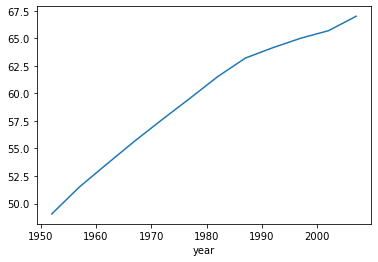

In [100]:
meanLifeExpByYear = df.groupby('year')['lifeExp'].mean()
meanLifeExpByYear.plot()

# 2. 데이터 다루기

#### 2-1 Series 만들기

- 1차원 자료 : 리스트와 유사, 넘파이의 어레이를 기본으로 만들어짐
- 한 열의 데이터는 모두 동일한 타입

In [2]:
import pandas as pd

In [6]:
a = pd.Series(['banana',10])
type(a)

pandas.core.series.Series

In [7]:
a

0    banana
1        10
dtype: object

In [8]:
b = pd.Series(data = ['홍길동','김철수'], index = ['a', 'b'])
b

a    홍길동
b    김철수
dtype: object

In [9]:
b.head()

a    홍길동
b    김철수
dtype: object

In [13]:
b.loc['a']

'홍길동'

In [14]:
b.iloc[0]

'홍길동'

In [122]:
scientists = pd.DataFrame({
        "Name": ["Rosaline Franklin", "William Gosset"],
        "Occupation": ["Chemist", "Statistician"],
        "Born": ["1920-07-25", "1876-06-13"],
        "Died": ["1958-04-16", "1937-10-16"],
        "Age": [37, 61],
})

In [123]:
scientists.columns

Index(['Name', 'Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [124]:
scientists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        2 non-null      object
 1   Occupation  2 non-null      object
 2   Born        2 non-null      object
 3   Died        2 non-null      object
 4   Age         2 non-null      int64 
dtypes: int64(1), object(4)
memory usage: 208.0+ bytes


In [125]:
scientists = pd.DataFrame(
    data = {
        "Occupation": ["Chemist", "Statistician"],
        "Born": ["1920-07-25", "1876-06-13"],
        "Died": ["1958-04-16", "1937-10-16"],
        "Age": [37, 61],
}
 , index = ["Rosaline Franklin", "William Gosset"])

In [126]:
scientists

,Occupation,Born,Died,Age
Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,Statistician,1876-06-13,1937-10-16,61


In [127]:
sc_row = scientists.loc['Rosaline Franklin']
sc_row

Occupation       Chemist
Born          1920-07-25
Died          1958-04-16
Age                   37
Name: Rosaline Franklin, dtype: object

In [128]:
sc_row.values

array(['Chemist', '1920-07-25', '1958-04-16', 37], dtype=object)

In [129]:
sc_row.index

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [130]:
# keys() 메소드는 index 속성과 같은 역할이다.
sc_row.keys()

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [131]:
sc_row.keys

<bound method Series.keys of Occupation       Chemist
Born          1920-07-25
Died          1958-04-16
Age                   37
Name: Rosaline Franklin, dtype: object>

In [132]:
sc_row.loc['Age']

37

In [133]:
scientists['Age']

Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64

In [134]:
scientists.loc[:,'Age']

Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64

In [135]:
age = scientists['Age']
ageMean = age.mean()
ageMin = age.min()
ageMax = age.max()
ageStd = age.std()

print('중앙값 :',ageMean,'\n','최소값 :', ageMin,'\n','최대값 :', ageMax,'\n','표준편차 :', ageStd)

중앙값 : 49.0 
 최소값 : 37 
 최대값 : 61 
 표준편차 : 16.97056274847714


In [136]:
scientists2 = pd.read_csv('../data/scientists.csv')

In [137]:
scientists2.head()

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist


In [138]:
age = scientists2['Age']
age

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [92]:
age.describe()

count     8.000000
mean     59.125000
std      18.325918
min      37.000000
25%      44.000000
50%      58.500000
75%      68.750000
max      90.000000
Name: Age, dtype: float64

In [93]:
# 벡터화된 값. 불리언값 리스트
age[age>age.mean()]

1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [94]:
# vector + vector
age + age 

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [95]:
# vector + scala
age + 10

0     47
1     71
2    100
3     76
4     66
5     55
6     51
7     87
Name: Age, dtype: int64

#### 2-3. 인덱스

In [139]:
rev_age = age.sort_index(ascending = False)
rev_age

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

In [97]:
age * 2

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [140]:
age + rev_age

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [141]:
first_scientists = scientists2[:4]
second_scientists = scientists2[4:]
first_scientists

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist


In [101]:
first_scientists * 2

,Name,Born,Died,Age,Occupation
0,Rosaline FranklinRosaline Franklin,1920-07-251920-07-25,1958-04-161958-04-16,74,ChemistChemist
1,William GossetWilliam Gosset,1876-06-131876-06-13,1937-10-161937-10-16,122,StatisticianStatistician
2,Florence NightingaleFlorence Nightingale,1820-05-121820-05-12,1910-08-131910-08-13,180,NurseNurse
3,Marie CurieMarie Curie,1867-11-071867-11-07,1934-07-041934-07-04,132,ChemistChemist


In [142]:
df1 = df2 = pd.DataFrame(
        data = [
            [1,2,3],[4,5,6]
            ]
)
df1.add(df2)

,0,1,2
0,2,4,6
1,8,10,12


#### 2-4. 열 추가

In [150]:
# data type 바꾸기(str -> int)
born_date = pd.to_datetime(scientists2['Born'], format = '%Y-%m-%d')
born_date

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [151]:
scientists2['BornDate'] = born_date
scientists2.head()

,Name,Born,Died,Age,Occupation,BornDate
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27


In [152]:
scientists2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        8 non-null      object        
 1   Born        8 non-null      object        
 2   Died        8 non-null      object        
 3   Age         8 non-null      int64         
 4   Occupation  8 non-null      object        
 5   BornDate    8 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 512.0+ bytes


In [153]:
died_date = pd.to_datetime(scientists2['Died'], format = '%Y-%m-%d')
died_date

0   1958-04-16
1   1937-10-16
2   1910-08-13
3   1934-07-04
4   1964-04-14
5   1858-06-16
6   1954-06-07
7   1855-02-23
Name: Died, dtype: datetime64[ns]

In [154]:
scientists2['DiedDate'] = died_date
scientists2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        8 non-null      object        
 1   Born        8 non-null      object        
 2   Died        8 non-null      object        
 3   Age         8 non-null      int64         
 4   Occupation  8 non-null      object        
 5   BornDate    8 non-null      datetime64[ns]
 6   DiedDate    8 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 576.0+ bytes


In [155]:
scientists2['age2'] = scientists2['DiedDate'] - scientists2['BornDate']
scientists2['age2'].dtype

dtype('<m8[ns]')

In [156]:
import numpy as np
scientists2['age2'] = (scientists2['age2'].dt.days/365).apply(np.floor)
scientists2

,Name,Born,Died,Age,Occupation,BornDate,DiedDate,age2
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,77.0


In [157]:
scientists2['DiedDate']

0   1958-04-16
1   1937-10-16
2   1910-08-13
3   1934-07-04
4   1964-04-14
5   1858-06-16
6   1954-06-07
7   1855-02-23
Name: DiedDate, dtype: datetime64[ns]

1. 각 assign을 분리하여 순차적으로 처리: age2_assign을 먼저 생성하고, 그 이후에 age2_divide365_assign을 생성해야 한다.
** .assign()은 새로운 DataFrame을 반환하는 메서드이므로, assign 할 값을 분리 및 생성한 후, 매번 원본DataFrame에 결과를 덮어써야 한다.<br>
2. 분리 및 순차적 처리

In [162]:
# 1-1) 
scientists2 = scientists2.assign(
    age2_assign = scientists2['DiedDate'] - scientists2['BornDate']
)

In [163]:
# 1-2)
scientists2 = scientists2.assign(
    age2_divide365_assign = (scientists2['age2_assign'].dt.days /365).apply(np.floor)
)

,Name,Born,Died,Age,Occupation,BornDate,DiedDate,age2,age2_assign,age2_divide365_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,37.0,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,61.0,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,90.0,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,66.0,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,56.0,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,45.0,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,41.0,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,77.0,28422 days,77.0


In [ ]:
# 2) 
# 이 코드는 .assign()이 한 번만 사용됨
# 먼저 할당한 age2_assign에 값을 할당한 후 해당 변수를 다시 사용하지 않고 수식을 입력했기 떄문에 keyerro 발생없이 실행 가능

scientists2 = scientists2.assign(
    age2_assign = scientists2['DiedDate'] - scientists2['BornDate'],
    age2_divide365_assign = ((scientists2['DiedDate'] - scientists2['BornDate']).dt.days / 365).apply(np.floor)
)

#### 2-5. 열 삭제하기

In [166]:
scientists2.columns

Index(['Name', 'Born', 'Died', 'Age', 'Occupation', 'BornDate', 'DiedDate',
       'age2', 'age2_assign'],
      dtype='object')

In [168]:
scientists2.drop(['Age'], axis = 'columns')

,Name,Born,Died,Occupation,BornDate,DiedDate,age2,age2_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16,37.0,13779 days
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16,61.0,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13,90.0,32964 days
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04,66.0,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14,56.0,20777 days
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15,1858-06-16,45.0,16529 days
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23,1954-06-07,41.0,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30,1855-02-23,77.0,28422 days


#### 2-6. 파일 저장하기

1. pickle로 저장하기
2. python의 data file 형식 : binary save & read
3. Series, DataFrame save

In [169]:
scientists2['Name']

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

In [170]:
# 괄호 안에 저장경로와 파일명 입력

scientists2['Name'].to_pickle('../data/scientist2_name_series.pickle')

In [173]:
readSc = pd.read_pickle('../data/scientist2_name_series.pickle')
print(readSc)

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object


In [177]:
pip install openpyxl

In [195]:
import openpyxl as pyxl

# Excel 파일로 저장 (openpyxl 엔진을 사용)
readXl = readSc.to_excel('../data/scientist2_name_series.xlsx', engine='openpyxl')

# 저장한 Excel 파일을 다시 openpyxl을 이용하여 읽기
from openpyxl import load_workbook

# Excel 파일 불러오기
sc2_wb = load_workbook('../data/scientist2_name_series.xlsx')
ws = sc2_wb.active

# 예시로 첫 번째 셀의 값 출력
print(ws['B2'].value)

Rosaline Franklin
